In [70]:
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [76]:
N = 100  # number of individuals
L = 100  # box size
ens = 1  # number of realizations
d = 1.5  # effective distance for virus
d2 = d*d

In [77]:
avdeg = (N-1)*np.pi*d2/(L**2)
probs = np.zeros(N, dtype='float16')

In [78]:
gamma = 1.0/18.0
R0 = 2.6
sigma = 1.0/5.0
beta = R0*gamma
probs[0] = 0
for i in range(1,N):
    probs[i]=sigma

In [79]:
A0 = 2   # number of initial infecteds
v = 3.

In [80]:
# for run in tqdm(ens):
A = np.zeros(N, dtype='uint8')       # A:infected
a = np.zeros(N, dtype='uint8')       # a: recovered
s = np.ones(N, dtype='uint8')      # s:susceptible
up = np.zeros(N, dtype='uint8')
# useful lists:
inf = np.zeros(N, dtype='uint8')
sus = np.zeros(N, dtype='uint8')
c = np.zeros(N, dtype='uint8')
U = np.zeros(N, dtype='uint8')

rc = np.random.choice(N, A0, replace=False)
A[rc] = 1
s[rc] = 0
numinf = [np.sum(A)]
numsus = [np.sum(s)]
r = np.random.random((N,2))*L
psi = np.random.random()*2.*np.pi
vv = np.random.random((N,2))*v
for i in range(numinf[-1]):
    inf[numinf[-1]] = i
    numinf[-1] += A[i]
    sus[numsus[-1]]
    numsus[-1] += s[i]

t=0
while(numinf[-1] != 0):   # let the system evolve till it doesn't!
    t+=1
    numinf.append(numinf[-1])
    numsus.append(numinf[-1])
    for i in range(numinf[-1]):
        for j in range(numsus[-1]):
            dx = np.abs(r[inf[i]][0]-r[sus[j]][0])
            dx = np.min([dx, L-dx])
            dy = np.abs(r[inf[i]][1]-r[sus[j]][1])
            dy = np.min([dy, L-dy])
            dist = dx**2 + dy**2
            c[sus[j]] += (d2<=dist)*(np.random.rand()<=beta)
    numU = 0
    for i in range(numsus[-1]): # list of exposeds
        U[numU] = sus[i]
        numU += (c[sus[i]]>0)
    for i in range(numU): # infection of exposed
        j = U[i]
        up[j] = (np.random.rand()<=probs[c[j]])
        A[j] = up[j]
        s[j] = not up[j]
        c[j] = 0
        up[j] = 0
    for i in range(numinf[-1]): # recovery
        j = inf[i]
        a[j] = (np.random.rand()<gamma)
        A[j] = 1-a[j]
    numinf[-1]=0
    numsus[-1]=0
    for i in range(N):
        inf[numinf[-1]] = i
        numinf[-1] += A[i]
        sus[numsus[-1]] = i
        numsus[-1] += s[i]
    r[:,0] += vv[:,0] + L
    r[:,0] = r[:,0] - 1.*L*np.floor(1.*r[:,0]/L)
    r[:,1] += vv[:,1] + L
    r[:,1] = r[:,1] - 1.*L*np.floor(1.*r[:,1]/L)
# absorbign state has been reached
Sum_inf = np.sum(a)
rho = 1.*Sum_inf/N

In [81]:
numinf = [1.*p/N for p in numinf]
numsus = [1.*p/N for p in numsus]
numrec = []
for i in range(len(numinf)):
    numrec.append(1-numinf[i]-numsus[i])
    
tt = np.arange(t+1)

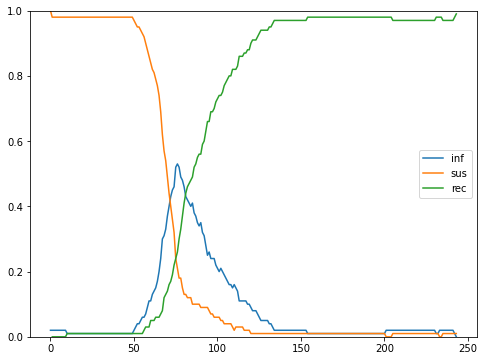

In [82]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tt,numinf,label='inf')
ax.plot(tt,numsus,label='sus')
ax.plot(tt,numrec,label='rec')
ax.set_ylim(0,1)
ax.legend()

62